In [1]:
import numpy as np
import pandas
from matplotlib import pyplot as plt
from IPython.display import display, HTML
import geopandas
#import matplotlib.ticker
import scipy.stats
thisdir = '/home/idies/workspace/Storage/raddick/Baltimore/community_reinvestment_act/'
datadir = thisdir + 'datasets_for_analysis/'
shapefile_basedir = '/home/idies/workspace/Storage/raddick/Baltimore/shapefiles/'
census_shapefile_tiger_basedir = '/home/idies/workspace/Temporary/raddick/census_scratch/shapefiles/'
figdir = thisdir + 'figures/'

debug = 1

print('ok')

ok


In [9]:
df = pandas.read_csv(datadir+'reinvestment_by_census_tract_for_smallest_businesses.csv', encoding='utf-8')#, index_col=['census_tract', 'activity_year'])

cra_info_columns = ['census_tract', 'activity_year', 'income_group_code', 'income_group', 'cra_level']

cra_loan_columns = ['nLoans1', 'nLoans100k', 'nLoans250k']
cra_loan_columns += ['nLoansToSmallest', 'nLoansTotal', 'nWorkingLoans']
cra_loan_columns += ['amtLoans1_adj', 'amtLoans100k_adj', 'amtLoans250k_adj']
cra_loan_columns += ['amtLoansToSmallest_adj', 'amtLoansTotal_adj', 'amtWorkingLoans_adj']

census_columns = ['census_tract', 'pop_total', 'total_householders', 'pop_white', 'pop_black']
census_columns += ['black_householder', 'white_householder', 'owner_occ_housing_units', 'mfi']
census_columns += ['female_householder', 'hs_grad_25plus', 'unemployed_16plus']
census_columns += ['poverty_past_12_months', 'median_home_value', 'median_year_built']
census_columns += ['pop_25plus', 'labor_force_16plus', 'poverty_status_known_last12months_total']

census_error_columns = ['census_tract', 'pop_total_err', 'total_householders_err', 'pop_white_err', 'pop_black_err']
census_error_columns += ['black_householder_err', 'white_householder_err', 'owner_occ_housing_units_err', 'mfi_err']
census_error_columns += ['female_householder_err', 'hs_grad_25plus_serr', 'unemployed_16plus_err']
census_error_columns += ['poverty_past_12_months_err', 'median_home_value_err', 'median_year_built_err']
census_error_columns += ['pop_25plus_serr', 'labor_force_16plus_err', 'poverty_status_known_last12months_total_err']

jobs_columns = ['census_tract']
jobs_columns += [x for x in df.columns.tolist() if 'jobs' in x.lower()]

census_tract_list = df['census_tract'].dropna().drop_duplicates().sort_values().tolist()

census_tracts_df = pandas.DataFrame(census_tract_list, columns=['census_tract'])
census_tracts_df = census_tracts_df.set_index('census_tract')
census_tracts_df = census_tracts_df.assign(nYears = df.groupby('census_tract').size())

census_tracts_df = census_tracts_df.join(df.groupby('census_tract')[cra_loan_columns].sum(), how='left')

census_tracts_df = census_tracts_df.join(df[jobs_columns][df['activity_year'] == 2015].set_index('census_tract'), how='left')

census_tracts_df = census_tracts_df.join(df[census_columns][df['activity_year'] == 2017].set_index('census_tract'), how='left')
census_tracts_df = census_tracts_df.join(df[census_error_columns][df['activity_year'] == 2017].set_index('census_tract'), how='left')

census_tracts_df = census_tracts_df.join(df[cra_info_columns][df['activity_year'] == 2017].set_index('census_tract'), how='left')

census_tracts_df = census_tracts_df.assign(nLoans1_per_sbjob = census_tracts_df['nLoans1'] / census_tracts_df['Number of jobs for workers at firms with Firm Size: 0-19 Employees'])
census_tracts_df = census_tracts_df.assign(nLoans100k_per_sbjob = census_tracts_df['nLoans100k'] / census_tracts_df['Number of jobs for workers at firms with Firm Size: 0-19 Employees'])
census_tracts_df = census_tracts_df.assign(nLoans250k_per_sbjob = census_tracts_df['nLoans250k'] / census_tracts_df['Number of jobs for workers at firms with Firm Size: 0-19 Employees'])
census_tracts_df = census_tracts_df.assign(nLoansToSmallest_per_sbjob = census_tracts_df['nLoansToSmallest'] / census_tracts_df['Number of jobs for workers at firms with Firm Size: 0-19 Employees'])
census_tracts_df = census_tracts_df.assign(nLoansTotal_per_sbjob = census_tracts_df['nLoansTotal'] / census_tracts_df['Number of jobs for workers at firms with Firm Size: 0-19 Employees'])
census_tracts_df = census_tracts_df.assign(nWorkingLoans_per_sbjob = census_tracts_df['nWorkingLoans'] / census_tracts_df['Number of jobs for workers at firms with Firm Size: 0-19 Employees'])
census_tracts_df = census_tracts_df.assign(amtLoans1_adj_per_sbjob = census_tracts_df['amtLoans1_adj'] / census_tracts_df['Number of jobs for workers at firms with Firm Size: 0-19 Employees'])
census_tracts_df = census_tracts_df.assign(amtLoans100k_adj_per_sbjob = census_tracts_df['amtLoans100k_adj'] / census_tracts_df['Number of jobs for workers at firms with Firm Size: 0-19 Employees'])
census_tracts_df = census_tracts_df.assign(amtLoans250k_adj_per_sbjob = census_tracts_df['amtLoans250k_adj'] / census_tracts_df['Number of jobs for workers at firms with Firm Size: 0-19 Employees'])
census_tracts_df = census_tracts_df.assign(amtLoansTotal_adj_per_sbjob = census_tracts_df['amtLoansTotal_adj'] / census_tracts_df['Number of jobs for workers at firms with Firm Size: 0-19 Employees'])
census_tracts_df = census_tracts_df.assign(amtWorkingLoans_adj_per_sbjob = census_tracts_df['amtWorkingLoans_adj'] / census_tracts_df['Number of jobs for workers at firms with Firm Size: 0-19 Employees'])
   
per_job_columns = ['nLoans1_per_sbjob', 'nLoans100k_per_sbjob', 'nLoans250k_per_sbjob']
per_job_columns += ['nLoansToSmallest_per_sbjob', 'nLoansTotal_per_sbjob']
per_job_columns += ['nWorkingLoans_per_sbjob', 'amtLoans1_adj_per_sbjob']
per_job_columns += ['amtLoans100k_adj_per_sbjob', 'amtLoans250k_adj_per_sbjob']
per_job_columns += ['amtLoansTotal_adj_per_sbjob', 'amtWorkingLoans_adj_per_sbjob']

print('fixing loans per job for tracts with zero jobs...')
for thiscol in per_job_columns:
    census_tracts_df.loc[census_tracts_df['Number of jobs for workers at firms with Firm Size: 0-19 Employees'] == 0, thiscol] = np.nan

    
    
print('calculating percentages from census data...')
census_tracts_df = census_tracts_df.assign(pct_white = census_tracts_df['pop_white'] / census_tracts_df['pop_total'])
census_tracts_df = census_tracts_df.assign(pct_black = census_tracts_df['pop_black'] / census_tracts_df['pop_total'])
census_tracts_df = census_tracts_df.assign(pct_white_householder = census_tracts_df['white_householder'] / census_tracts_df['total_householders'])
census_tracts_df = census_tracts_df.assign(pct_black_householder = census_tracts_df['black_householder'] / census_tracts_df['total_householders'])
census_tracts_df = census_tracts_df.assign(pct_female_householder = census_tracts_df['female_householder'] / census_tracts_df['total_householders'])
census_tracts_df = census_tracts_df.assign(pct_hs_grad = census_tracts_df['hs_grad_25plus'] / census_tracts_df['pop_25plus'])
census_tracts_df = census_tracts_df.assign(pct_unemployed = census_tracts_df['unemployed_16plus'] / census_tracts_df['labor_force_16plus'])
census_tracts_df = census_tracts_df.assign(pct_in_poverty = census_tracts_df['poverty_past_12_months'] / census_tracts_df['poverty_status_known_last12months_total'])

census_tracts_df = census_tracts_df.assign(excess_race = np.nan)
census_tracts_df.loc[census_tracts_df['pct_black'] > 0.65, 'excess_race'] = 'black'
census_tracts_df.loc[census_tracts_df['pct_black'] <= 0.65, 'excess_race'] = 'white'

print('census tracts by excess race:')
print(census_tracts_df[census_tracts_df['nYears'] == 7].groupby('excess_race').size())
demographic_columns = ['pct_white', 'pct_black', 'pct_white_householder', 'pct_black_householder']
demographic_columns += ['pct_female_householder', 'pct_hs_grad', 'pct_unemployed', 'pct_in_poverty']
demographic_columns += ['mfi', 'median_home_value']#, 'median_year_built']

print('backing up...')
census_tracts_df_bk = census_tracts_df

print('ok')

fixing loans per job for tracts with zero jobs...
calculating percentages from census data...
census tracts by excess race:
excess_race
black    107
white     79
dtype: int64
backing up...
ok


In [10]:
# Correlations between demographic variables...

htmlString = '<table>'
htmlString += '<tr>'
htmlString += '<th>variable</th>'
for x in demographic_columns:
    htmlString += '<th>{0:}</th>'.format(x.replace('pct_', '%').replace('householder', 'HH'))
htmlString += '</tr>'

for i in range(0, len(demographic_columns)):
    htmlString += '<tr>'
    htmlString += '<th>{0:}</th>'.format(demographic_columns[i].replace('pct_', '%').replace('householder', 'HH'))
    for j in range(0,i):
        htmlString += '<td>-</td>'
    for j in range(i, len(demographic_columns)):
        (r, p) = scipy.stats.pearsonr(
            census_tracts_df[demographic_columns[i]][(census_tracts_df[demographic_columns[i]].notnull()) & (census_tracts_df[demographic_columns[j]].notnull())].values, 
            census_tracts_df[demographic_columns[j]][(census_tracts_df[demographic_columns[i]].notnull()) & (census_tracts_df[demographic_columns[j]].notnull())].values)
        htmlString += '<td>{0:.3f}</td>'.format(r)
    htmlString += '</tr>'
#        print(
#            x, y, census_tracts_df[x][
#            (census_tracts_df[x].notnull()) & (census_tracts_df[y].notnull())
#        ].sample(1).values, 
#              census_tracts_df[y][
#            (census_tracts_df[x].notnull()) & (census_tracts_df[y].notnull())
#        ].sample(1).values,
#        scipy.stats.pearsonr(
#            census_tracts_df[x][(census_tracts_df[x].notnull()) & (census_tracts_df[y].notnull())].values, 
#            census_tracts_df[y][(census_tracts_df[x].notnull()) & (census_tracts_df[y].notnull())].values)
#             )
htmlString += '</table>'

display(HTML(htmlString))

variable,%white,%black,%white_HH,%black_HH,%female_HH,%hs_grad,%unemployed,%in_poverty,mfi,median_home_value
%white,1.000,-0.986,0.988,-0.980,-0.822,-0.788,-0.693,-0.563,0.726,0.678
%black,-,1.000,-0.977,0.993,0.821,0.783,0.694,0.526,-0.703,-0.665
%white_HH,-,-,1.000,-0.985,-0.803,-0.778,-0.687,-0.584,0.740,0.685
%black_HH,-,-,-,1.000,0.804,0.773,0.686,0.535,-0.704,-0.660
%female_HH,-,-,-,-,1.000,0.806,0.721,0.596,-0.712,-0.677
%hs_grad,-,-,-,-,-,1.000,0.676,0.537,-0.777,-0.782
%unemployed,-,-,-,-,-,-,1.000,0.616,-0.651,-0.622
%in_poverty,-,-,-,-,-,-,-,1.000,-0.699,-0.522
mfi,-,-,-,-,-,-,-,-,1.000,0.856
median_home_value,-,-,-,-,-,-,-,-,-,1.000


Getting census tract shapefiles for 2017...
cutting out harbor (thanks Darius!)...
backing up...


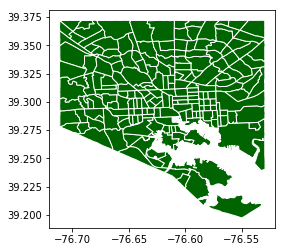

In [11]:
thisyear = 2017

if (debug > 0):
    print('Getting census tract shapefiles for {0:.0f}...'.format(thisyear))
tract_shapes_gdf = geopandas.read_file(census_shapefile_tiger_basedir +'{0:.0f}/TRACT/tl_{0:.0f}_24_tract.shp'.format(thisyear))
tract_shapes_gdf = tract_shapes_gdf[tract_shapes_gdf['COUNTYFP'] == '510']
tract_shapes_gdf.loc[:, 'NAME'] = pandas.to_numeric(tract_shapes_gdf['NAME'], errors='coerce')
tract_shapes_gdf = tract_shapes_gdf.assign(census_tract = pandas.to_numeric(tract_shapes_gdf['GEOID'].apply(lambda x: x[5:9]+'.'+x[9:]), errors='coerce'))
tract_shapes_gdf = tract_shapes_gdf.drop('GEOID', axis=1)
tract_shapes_gdf = tract_shapes_gdf.set_index('census_tract')

print('cutting out harbor (thanks Darius!)...')
water_gdf = geopandas.read_file(shapefile_basedir+'water/water.shp')
water_gdf = water_gdf.to_crs(tract_shapes_gdf.crs)

tract_shapes_gdf = geopandas.overlay(tract_shapes_gdf, water_gdf[water_gdf['NAME'] == 'Harbor'], how='difference')

tract_shapes_gdf.plot(color='darkgreen', edgecolor='white')

print('backing up...')
tract_shapes_gdf_bk = tract_shapes_gdf

plt.show()


In [12]:
print('getting from backup...')
census_tracts_df = census_tracts_df_bk
tract_shapes_gdf = tract_shapes_gdf_bk

print('joining shapefiles to data...')
census_tracts_df = census_tracts_df.join(tract_shapes_gdf, how='left')#, lsuffix='_loans', rsuffix='_shapes')#[['GEOID_loans', 'GEOID_shapes']]
census_tracts_gdf = geopandas.GeoDataFrame(census_tracts_df, crs=tract_shapes_gdf.crs)

print('backing up...')
census_tracts_gdf_bk = census_tracts_gdf

print('ok')


getting from backup...
joining shapefiles to data...
backing up...
ok


getting from backup...
plotting...


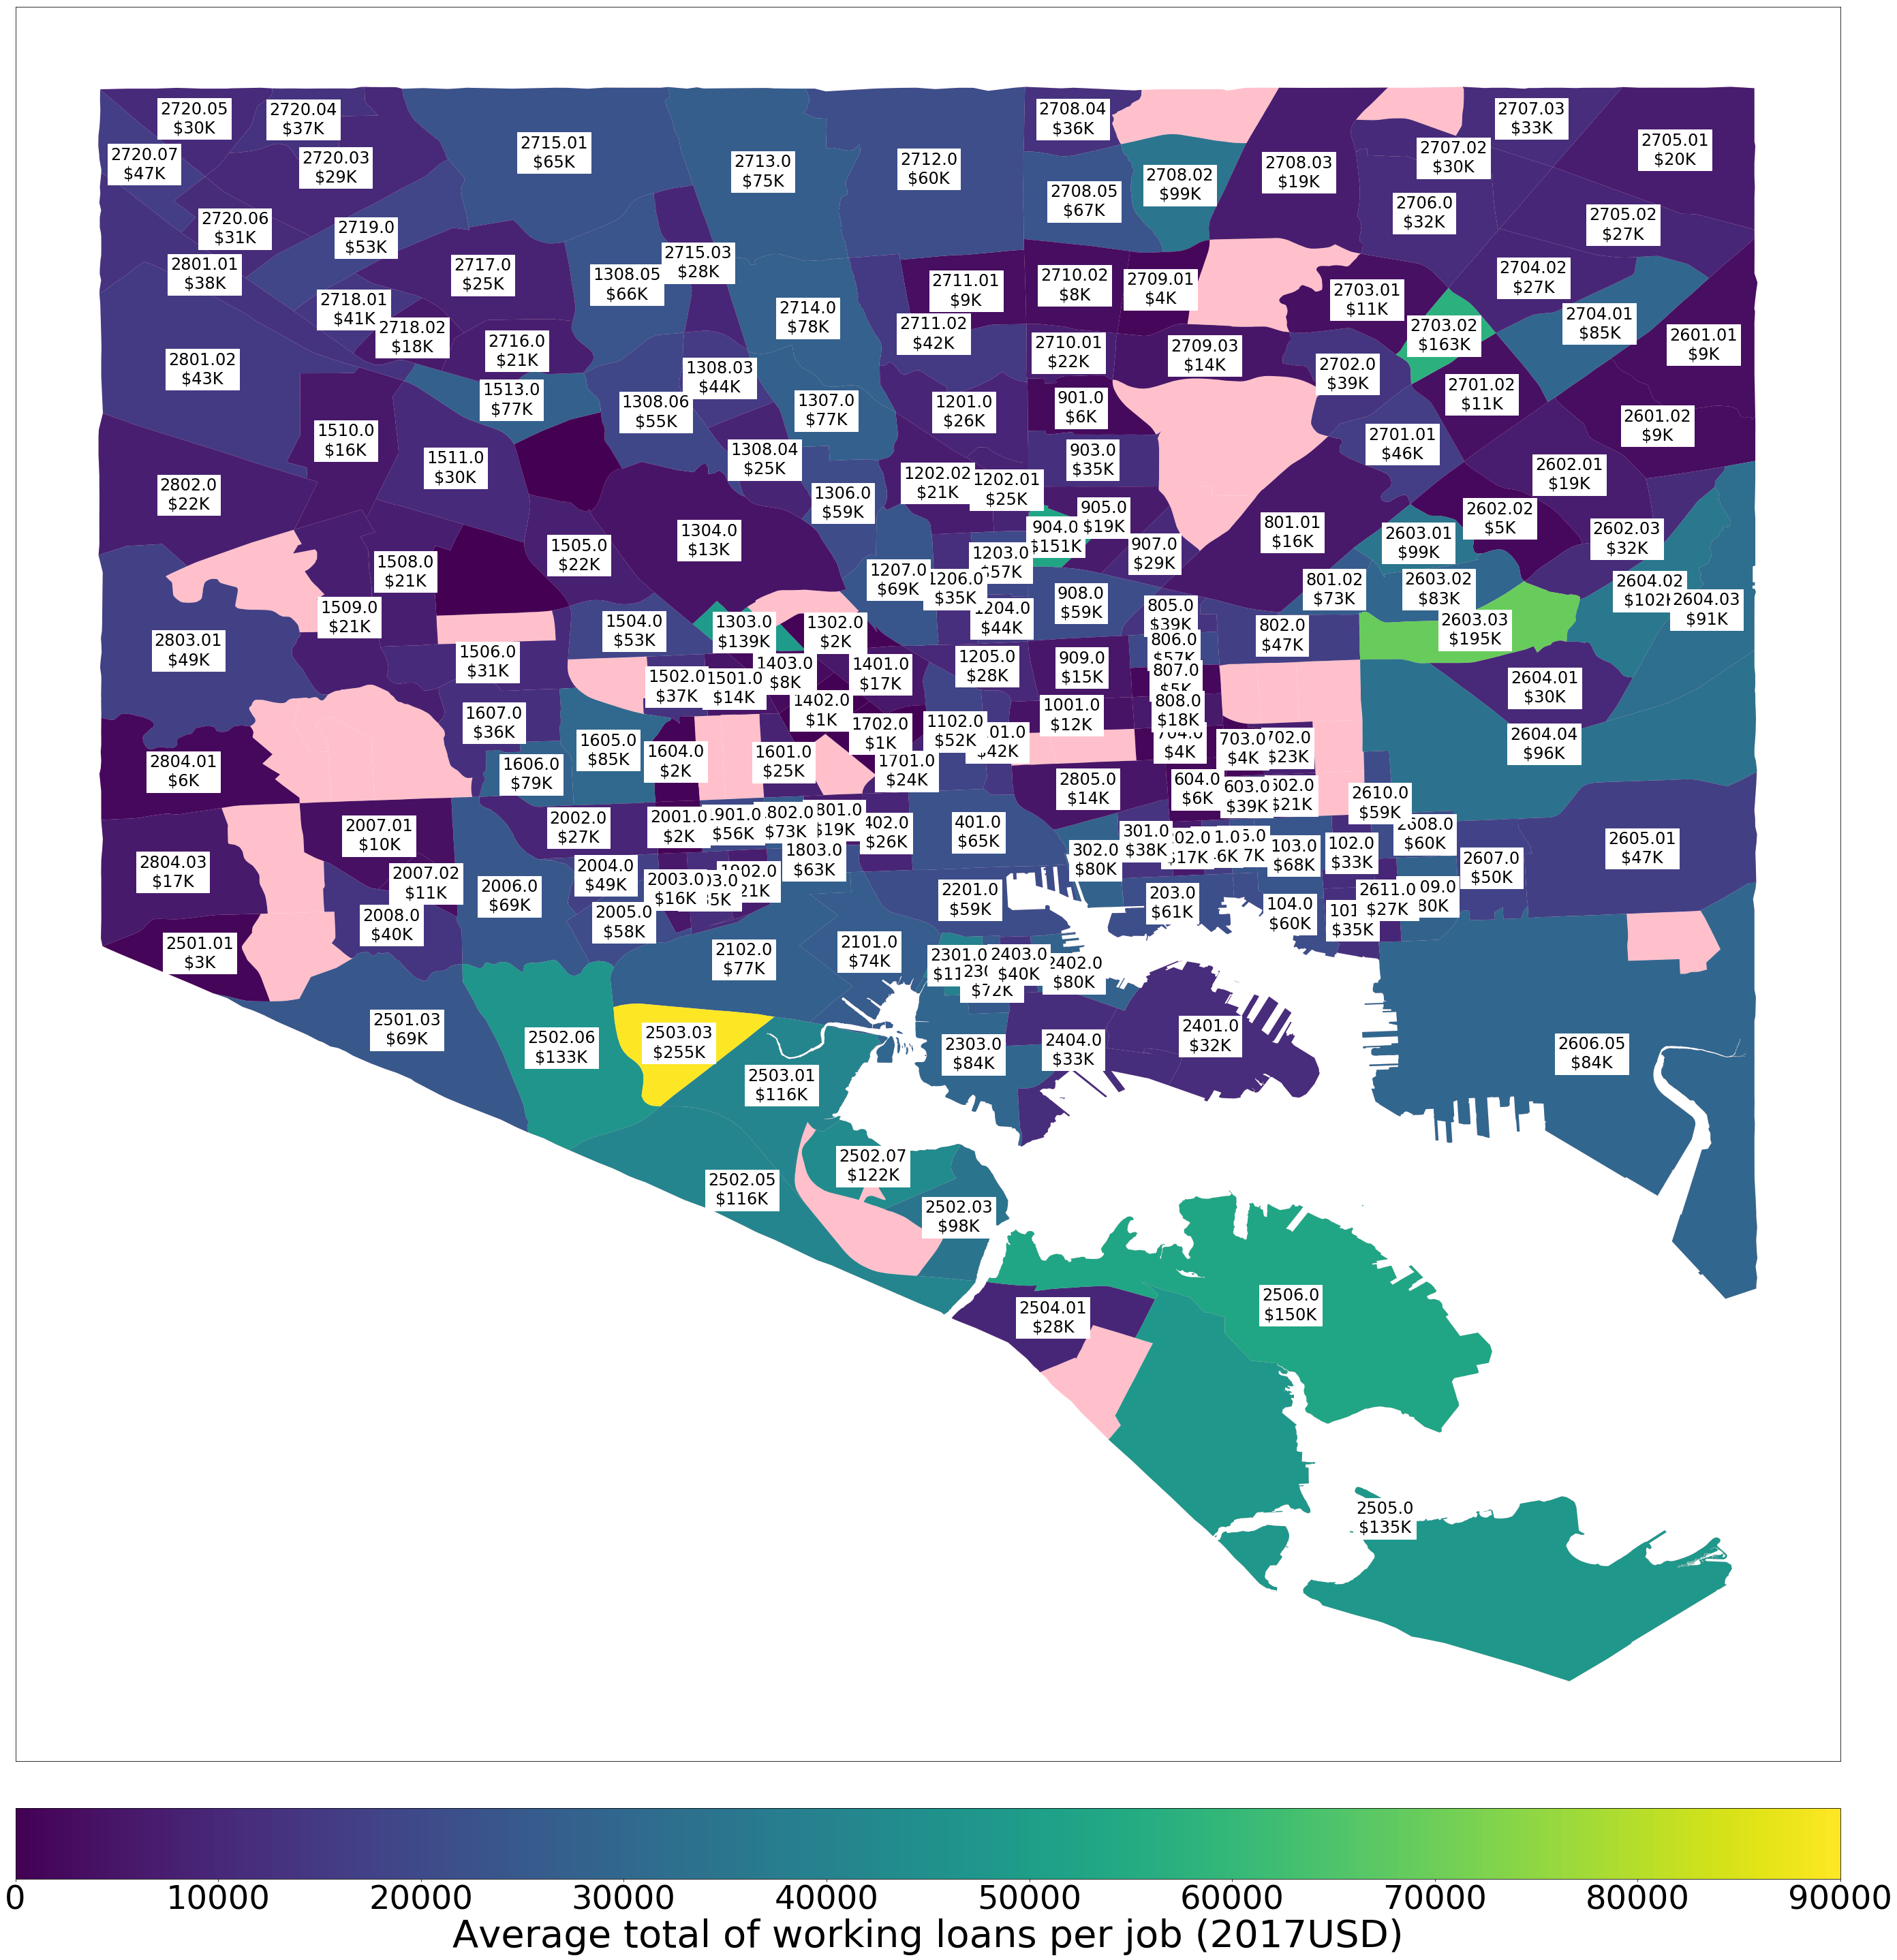

In [13]:
print('getting from backup...')
census_tracts_gdf = census_tracts_gdf_bk

print('plotting...')
scale = 1
show_labels = True

fig, ax = plt.subplots(1,1, figsize=(48*scale,48*scale))
census_tracts_gdf.plot(color='pink', ax=ax)
census_tracts_gdf[
    (census_tracts_gdf['amtWorkingLoans_adj_per_sbjob'].notnull())
    & (census_tracts_gdf['Number of jobs for workers at firms with Firm Size: 0-19 Employees'] > 25)
].plot(column='amtWorkingLoans_adj_per_sbjob', ax=ax)

ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labeltop=False, labelleft=False, labelright=False)

if (show_labels):
    for ix, thisrow in census_tracts_gdf[
        (census_tracts_gdf['amtWorkingLoans_adj_per_sbjob'].notnull())
        & (census_tracts_gdf['Number of jobs for workers at firms with Firm Size: 0-19 Employees'] > 25)
    ].iterrows():
        if (thisrow['amtWorkingLoans_adj_per_sbjob'] > 0):
            annotator = str(ix).replace('-', '- ')
            annotator = annotator.replace('/', '/ ')
            annotator = annotator.replace(' ', '\n')
            annotator += '\n'
            annotator += '${:,.0f}k'.format(np.round(thisrow['amtWorkingLoans_adj_per_sbjob'] / 1000, 0))
            annotator = annotator.upper()
            ax.annotate(annotator, 
                        xy=(thisrow.geometry.centroid.x, thisrow.geometry.centroid.y), 
                        xytext=(thisrow.geometry.centroid.x, thisrow.geometry.centroid.y), 
                        ha='center', va='center', fontsize=24*scale, color='black', 
                         backgroundcolor='white')

cax = fig.add_axes([0.125, 0.08, 0.775, 0.03])
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=0, vmax=90000))
# fake up the array of the scalar mappable. Urgh...
sm._A = []

cbar = fig.colorbar(sm, cax=cax, format='%.0f', orientation='horizontal') #, ticks=np.arange(0, 90001, 10000))

cax.tick_params(labelsize=48*scale)

cbar.set_label('Average total of working loans per job (2017USD)', fontsize=56*scale)

plt.show()
#scale = 2
#census_tracts_gdf['amtWorkingLoans_adj_per_sbjob'][
#    census_tracts_gdf['amtWorkingLoans_adj_per_sbjob'].notnull()
#].sort_values(ascending=False)

#fig, ax = plt.subplots(1,1,figsize=(20*scale,20*scale))

#census_tracts_gdf.loc[2503.03]


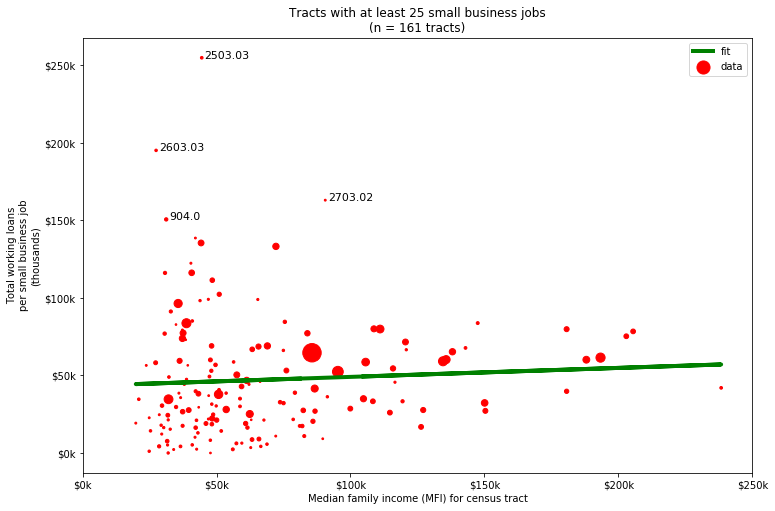

Loans per SB job = 0.058*MFI + $43,273 (r^2 = 0.004)


In [45]:
show_labels = True

get_columns = ['income_group_code', 'income_group', 'cra_level']
get_columns += ['amtWorkingLoans_adj', 'amtLoansToSmallest_adj']
get_columns += ['pop_total', 'total_householders', 'pop_white', 'pop_black', 'mfi']
get_columns += ['black_householder', 'white_householder']
get_columns += ['Total number of jobs']
get_columns += ['Number of jobs for workers at firms with Firm Size: 0-19 Employees']
get_columns += ['excess_race']

xdf = census_tracts_df[get_columns][
    (census_tracts_df['nYears'] == 7) 
    & (census_tracts_df['amtWorkingLoans_adj_per_sbjob'].notnull())
    & (census_tracts_df['cra_level'] != 'unknown')
    & (census_tracts_df['Number of jobs for workers at firms with Firm Size: 0-19 Employees'] >= 25)
]

#xdf = xdf.assign(amtWorkingLoans_adj_per_total_job = xdf['amtWorkingLoans_adj'] / xdf['Total number of jobs'])
xdf = xdf.assign(amtWorkingLoans_adj_per_sb_job = xdf['amtWorkingLoans_adj'] / xdf['Number of jobs for workers at firms with Firm Size: 0-19 Employees'])
xdf = xdf.assign(pct_white = xdf['pop_white'] / xdf['pop_total'])
xdf = xdf.assign(pct_black = xdf['pop_black'] / xdf['pop_total'])

s = xdf['Number of jobs for workers at firms with Firm Size: 0-19 Employees'].apply(lambda x: x/10).tolist()

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(
    xdf['mfi'].values,  xdf['amtWorkingLoans_adj_per_sb_job'].values
)

fig, ax1 = plt.subplots(1,1, figsize=(12,8))
ax1.plot(xdf['mfi'], slope*xdf['mfi'] + intercept, color='green', linewidth=4)
ax1.scatter(
    xdf['mfi'], xdf['amtWorkingLoans_adj_per_sb_job'], color='red', s=s
)

if (show_labels):
    for ix, thisrow in xdf.iterrows():
        if (thisrow['amtWorkingLoans_adj_per_sb_job'] > 150000):
            #print(thisrow['mfi'],thisrow['amtWorkingLoans_adj_per_sb_job'])
            annotator = str(ix).replace('-', '- ')
            annotator = annotator.replace('/', '/ ')
            annotator = annotator.replace(' ', '\n')
            #annotator += '\n'
            #annotator += '${:,.0f}k'.format(np.round(thisrow['amtWorkingLoans_adj_per_sb_job'] / 1000, 0))
            annotator = annotator.upper()
            ax1.annotate(annotator, 
                        xy=(thisrow['mfi'], thisrow['amtWorkingLoans_adj_per_sb_job']), fontsize=11,
                        xytext=(thisrow['mfi'] + 1000, thisrow['amtWorkingLoans_adj_per_sb_job'] - 500))
                        #ha='center', va='center', fontsize=24*scale, color='black')

ax1.set_xlabel('Median family income')
ax1.set_ylabel('Total working loans\nper small business job\n(thousands)')

xticks = np.arange(0, 300000, 50000)
xlabels = ['${0:.0f}k'.format(x/1000) for x in xticks]
plt.xticks(xticks, xlabels)

yticks = np.arange(0, 300000, 50000)
ylabels = ['${0:.0f}k'.format(x/1000) for x in yticks]
plt.yticks(yticks, ylabels)

ax1.set_xlabel('Median family income (MFI) for census tract')
ax1.set_ylabel('Total working loans\nper small business job\n(thousands)')

plt.legend(['fit', 'data'])
ax1.set_title('Tracts with at least 25 small business jobs\n(n = {0:.0f} tracts)'.format(len(xdf)))

plt.show()
#xdf.columns.tolist()
if (intercept >= 0):
    sign = '+'
else:
    sign = '-'
if (intercept >= 0):
    sign = '+'
else:
    sign = '-'

print('Loans per SB job = {0:.3f}*MFI {1:} ${2:,.0f} (r^2 = {3:.3f})'.format(slope, sign, intercept, r_value**2))


#print(slopew, interceptw, slopeb, interceptb)
#xdf['Number of jobs for workers at firms with Firm Size: 0-19 Employees'].sort_values()

In [ ]:
print('getting from backup...')
census_tracts_gdf = census_tracts_gdf_bk

print('plotting...')
scale = 1
show_labels = True

fig, ax = plt.subplots(1,1, figsize=(48*scale,48*scale))
census_tracts_gdf.plot(color='pink', ax=ax)
census_tracts_gdf[
    (census_tracts_gdf['amtWorkingLoans_adj_per_sbjob'].notnull())
    & (census_tracts_gdf['pct_black'].notnull())
    & (census_tracts_gdf['Number of jobs for workers at firms with Firm Size: 0-19 Employees'] > 25)
].plot(column='pct_black', ax=ax, cmap='Greys')

ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labeltop=False, labelleft=False, labelright=False)

if (show_labels):
    for ix, thisrow in census_tracts_gdf[
        (census_tracts_gdf['amtWorkingLoans_adj_per_sbjob'].notnull())
        & (census_tracts_gdf['pct_black'].notnull())
        & (census_tracts_gdf['Number of jobs for workers at firms with Firm Size: 0-19 Employees'] > 25)
    ].iterrows():
        if (thisrow['amtWorkingLoans_adj_per_sbjob'] > 0):
            annotator = str(ix).replace('-', '- ')
            annotator = annotator.replace('/', '/ ')
            annotator = annotator.replace(' ', '\n')
            annotator += '\n'
            annotator += '{:.0%}'.format(thisrow['pct_black'])
            annotator = annotator.upper()
            ax.annotate(annotator, 
                        xy=(thisrow.geometry.centroid.x, thisrow.geometry.centroid.y), 
                        xytext=(thisrow.geometry.centroid.x, thisrow.geometry.centroid.y), 
                        ha='center', va='center', fontsize=24*scale, color='black', 
                         backgroundcolor='white')

cax = fig.add_axes([0.125, 0.08, 0.775, 0.03])
sm = plt.cm.ScalarMappable(cmap='Greys', norm=plt.Normalize(vmin=0, vmax=1))
# fake up the array of the scalar mappable. Urgh...
sm._A = []

cbar = fig.colorbar(sm, cax=cax, format='%.2f', orientation='horizontal') #, ticks=np.arange(0, 90001, 10000))

cax.tick_params(labelsize=48*scale)

cbar.set_label('Fraction of black residents', fontsize=56*scale)

plt.show()
#scale = 2
#census_tracts_gdf['amtWorkingLoans_adj_per_sbjob'][
#    census_tracts_gdf['amtWorkingLoans_adj_per_sbjob'].notnull()
#].sort_values(ascending=False)

#fig, ax = plt.subplots(1,1,figsize=(20*scale,20*scale))

#census_tracts_gdf.loc[2503.03]


In [ ]:
v = ['amtWorkingLoans_adj_per_sbjob', 'pop_total'] + demographic_columns
census_tracts_df[v].sort_values(by='amtWorkingLoans_adj_per_sbjob', ascending=False)